# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [3]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [4]:
df.isnull().sum()

accountAge                                      0
digitalItemCount                                0
sumPurchaseCount1Day                            0
sumPurchaseAmount1Day                           0
sumPurchaseAmount30Day                          0
paymentBillingPostalCode - LogOddsForClass_0    0
accountPostalCode - LogOddsForClass_0           0
paymentBillingState - LogOddsForClass_0         0
accountState - LogOddsForClass_0                0
paymentInstrumentAgeInAccount                   0
ipState - LogOddsForClass_0                     0
transactionAmount                               0
transactionAmountUSD                            0
ipPostalCode - LogOddsForClass_0                0
localHour - LogOddsForClass_0                   0
Label                                           0
dtype: int64

In [5]:
df.describe()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
count,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,1.387210e+05,138721.000000,138721.000000,138721.000000,138721.000000
mean,408.456679,0.865017,1.224018,92.411768,57.280717,3.852491,3.468364,4.427882,4.287014,72.623256,3.806588,2.389925e+03,236.033152,2.816048,4.768151,0.005745
std,711.300625,0.604681,11.235396,1105.622216,806.837009,2.023177,2.127371,0.994649,0.992454,271.189458,1.039490,4.998821e+04,998.162648,1.497330,0.363702,0.075580
min,1.000000,0.000000,0.000000,0.000000,0.000000,-0.154151,-0.154151,0.265703,0.342945,0.000000,0.265703,1.000000e-02,0.000000,0.182322,0.421214,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.887303,0.716678,3.817305,3.811097,0.000000,3.356462,8.479000e+01,85.190000,1.408767,4.745402,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,5.064533,5.096396,4.422139,4.497450,0.000000,4.114614,1.399900e+02,139.990000,2.929287,4.886641,0.000000
75%,497.000000,1.000000,0.000000,0.000000,0.000000,5.064533,5.096396,5.563677,4.992339,0.029861,4.453620,2.395100e+02,199.754240,3.865009,4.962055,0.000000
max,2000.000000,29.000000,505.000000,258877.420000,258877.420000,5.412885,5.096396,5.563677,5.561934,4019.593056,4.874212,8.999998e+06,132568.670000,5.008490,5.040929,1.000000


In [6]:
n_samples = df.shape[0]
print('Muestras en data ',n_samples)
n_samples_0 = (df['Label'] == 0).sum()
print('Muestras en data negativas(0) ',n_samples_0)
n_samples_1 = (df['Label'] == 1).sum()
print('Muestras en data positivas(1) ',n_samples_1)

Muestras en data  138721
Muestras en data negativas(0)  137924
Muestras en data positivas(1)  797


# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Psrtir desde aqui la baseen training and test y poner semilla de 42

In [7]:
X = df.drop(['Label'], axis=1)
y = df['Label']
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
models = {'LR_Unbalanced': LogisticRegression(),
          'DT_Unbalanced': DecisionTreeClassifier()}

for model in models.keys():
    models[model].fit(X_train, y_train)
    
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [9]:
#from sklearn.metrics import mean_squared_error
from sklearn import metrics
Mtrs=pd.DataFrame(columns=['Model','ACC',"F1",'F_Beta'],data=[])
Mtrs.shape[0]
i=0
for model in models.keys():
    ACC=metrics.accuracy_score(y_test,y_pred[model])
    F1=metrics.f1_score(y_test,y_pred[model])
    F_beta=metrics.fbeta_score(y_test,y_pred[model], beta=10)
    Mtrs.loc[i] = [model,ACC,F1,F_beta]
    i=i+1
Mtrs

,Model,ACC,F1,F_Beta
0,LR_Unbalanced,0.994291,0.000000,0.000000
1,DT_Unbalanced,0.988322,0.132762,0.156012


# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [10]:
n_samples = y_train.shape[0]
print('Muestras en data_train ',n_samples)
n_samples_0 = (y_train == 0).sum()
print('Muestras en data_train negativas(0) ',n_samples_0)
n_samples_1 = (y_train == 1).sum()
print('Muestras en data_train positivas(1) ',n_samples_1)

Muestras en data_train  104040
Muestras en data_train negativas(0)  103441
Muestras en data_train positivas(1)  599


In [11]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot


Target percentage 0.5
y.shape =  1156      y.mean() =  0.5181660899653979
y_neg.shape =  557   y_pos.shape =  599


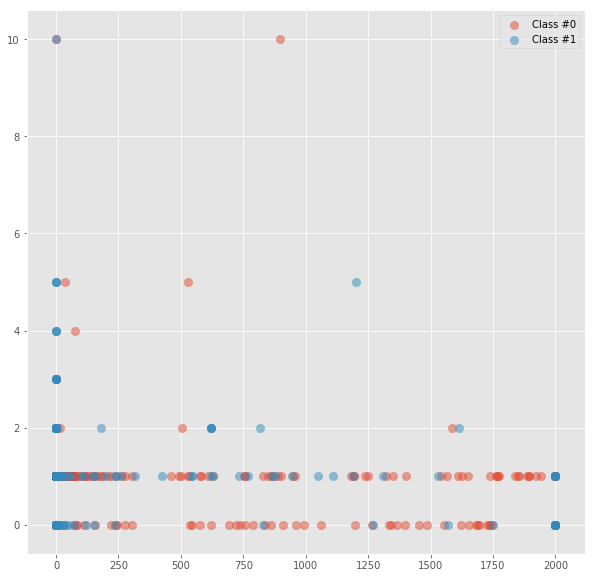

In [13]:
X_u, y_u = UnderSampling(np.array(X_train), np.array(y_train), 0.5, 42)
print('Target percentage', 0.5)
print('y.shape = ',y_u.shape[0], '     y.mean() = ', y_u.mean())
print('y_neg.shape = ',(y_u == 0).sum(), '  y_pos.shape = ',(y_u == 1).sum())
plot_two_classes(X_u, y_u)
plt.show()    

In [14]:
models = {'LR_UnderSampling': LogisticRegression(),
          'DT_UnderSampling': DecisionTreeClassifier()}

for model in models.keys():
    models[model].fit(X_u, y_u)
    
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [15]:
#from sklearn.metrics import mean_squared_error
for model in models.keys():
    ACC=metrics.accuracy_score(y_test,y_pred[model])
    F1=metrics.f1_score(y_test,y_pred[model])
    F_beta=metrics.fbeta_score(y_test,y_pred[model], beta=10)
    Mtrs.loc[i] = [model,ACC,F1,F_beta]
    i=i+1
Mtrs

,Model,ACC,F1,F_Beta
0,LR_Unbalanced,0.994291,0.000000,0.000000
1,DT_Unbalanced,0.988322,0.132762,0.156012
2,LR_UnderSampling,0.548341,0.017561,0.397794
3,DT_UnderSampling,0.624059,0.020583,0.420399


Which is parameter for target_percentage did you choose? How the results change?

Se utiliza para target_percentege un balanceo del 50% con el fin de que queden aproximadamente la misma cantidad de muestras positivas y muestras negativas. al utilizarlo de esa forma obtenemos una cantidad de muestras balanceadas como se observo en la grafica anterior:

Target percentage 0.5
y.shape =  1156      y.mean() =  0.5181660899653979
y_neg.shape =  557   y_pos.shape =  599

los cambios mas importantes se observan en la Regresion Logistica, donde disminuye significativamente el accuracy y el F1 y FBeta aumentan solo un poco.

# Exercise 15.3

Same analysis using random-over-sampling

In [16]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

Target percentage 0.5
y.shape =  206882      y.mean() =  0.5
y_neg.shape =  103441   y_pos.shape =  103441


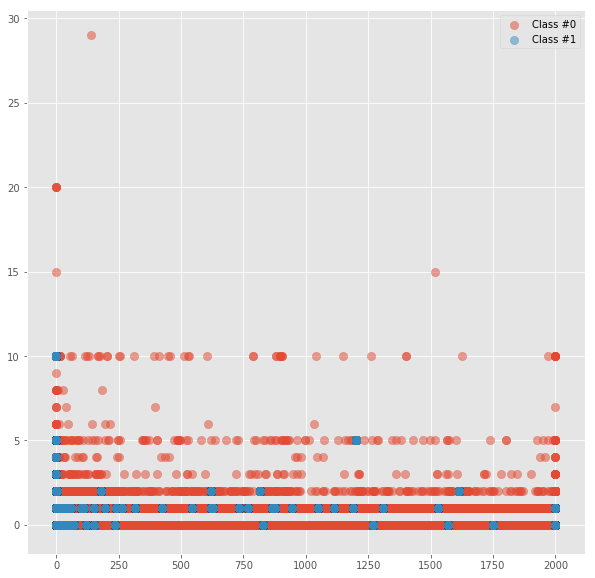

In [17]:
X_o, y_o = OverSampling(np.array(X_train), np.array(y_train), 0.5, 42)
print('Target percentage', 0.5)
print('y.shape = ',y_o.shape[0], '     y.mean() = ', y_o.mean())
print('y_neg.shape = ',(y_o == 0).sum(), '  y_pos.shape = ',(y_o == 1).sum())
plot_two_classes(X_o, y_o)
plt.show()    

In [18]:
models = {'LR_OverSampling': LogisticRegression(),
          'DT_OverSampling': DecisionTreeClassifier()}

for model in models.keys():
    models[model].fit(X_o, y_o)
    
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [19]:
#from sklearn.metrics import mean_squared_error
for model in models.keys():
    ACC=metrics.accuracy_score(y_test,y_pred[model])
    F1=metrics.f1_score(y_test,y_pred[model])
    F_beta=metrics.fbeta_score(y_test,y_pred[model], beta=10)
    Mtrs.loc[i] = [model,ACC,F1,F_beta]
    i=i+1
Mtrs

,Model,ACC,F1,F_Beta
0,LR_Unbalanced,0.994291,0.000000,0.000000
1,DT_Unbalanced,0.988322,0.132762,0.156012
2,LR_UnderSampling,0.548341,0.017561,0.397794
3,DT_UnderSampling,0.624059,0.020583,0.420399
4,LR_OverSampling,0.555001,0.018444,0.414579
5,DT_OverSampling,0.989793,0.149038,0.156409


# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [20]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

Target percentage 0.5 k  5
y.shape =  206882      y.mean() =  0.5
y_neg.shape =  103441   y_pos.shape =  103441


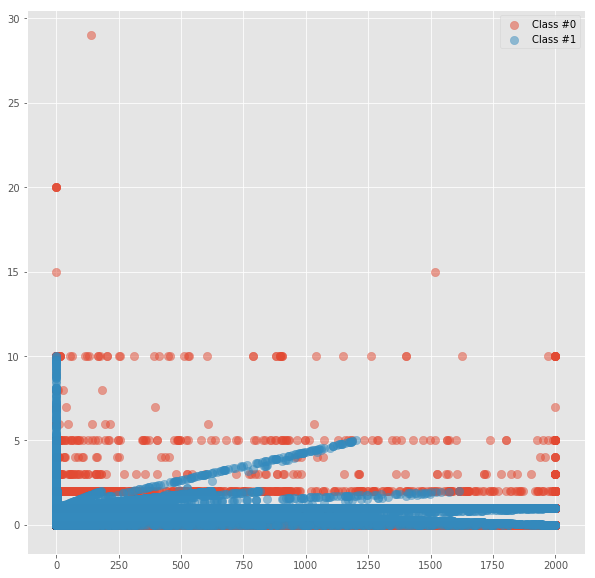

In [21]:
X_s, y_s = SMOTE(np.array(X_train), np.array(y_train), 0.5, 5, seed=42)
print('Target percentage', 0.5, 'k ', 5)
print('y.shape = ',y_s.shape[0], '     y.mean() = ', y_s.mean())
print('y_neg.shape = ',(y_s == 0).sum(), '  y_pos.shape = ',(y_s == 1).sum())
plot_two_classes(X_s, y_s)
plt.show()    


In [22]:
models = {'LR_SmoteSampling': LogisticRegression(),
          'DT_SmoteSampling': DecisionTreeClassifier()}

for model in models.keys():
    models[model].fit(X_s, y_s)
    
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [23]:
for model in models.keys():
    ACC=metrics.accuracy_score(y_test,y_pred[model])
    F1=metrics.f1_score(y_test,y_pred[model])
    F_beta=metrics.fbeta_score(y_test,y_pred[model], beta=10)
    Mtrs.loc[i] = [model,ACC,F1,F_beta]
    i=i+1
Mtrs

,Model,ACC,F1,F_Beta
0,LR_Unbalanced,0.994291,0.000000,0.000000
1,DT_Unbalanced,0.988322,0.132762,0.156012
2,LR_UnderSampling,0.548341,0.017561,0.397794
3,DT_UnderSampling,0.624059,0.020583,0.420399
4,LR_OverSampling,0.555001,0.018444,0.414579
5,DT_OverSampling,0.989793,0.149038,0.156409
6,LR_SmoteSampling,0.713907,0.021885,0.376891
7,DT_SmoteSampling,0.983536,0.111975,0.179600


# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [24]:
from imblearn.over_sampling import ADASYN
def makeOverSamplesADASYN(X,y):
    sm = ADASYN(random_state=42)
    X, y = sm.fit_sample(X, y)
    return(X,y)

Target percentage
y.shape =  206914      y.mean() =  0.5000773268121055
y_neg.shape =  103441   y_pos.shape =  103473


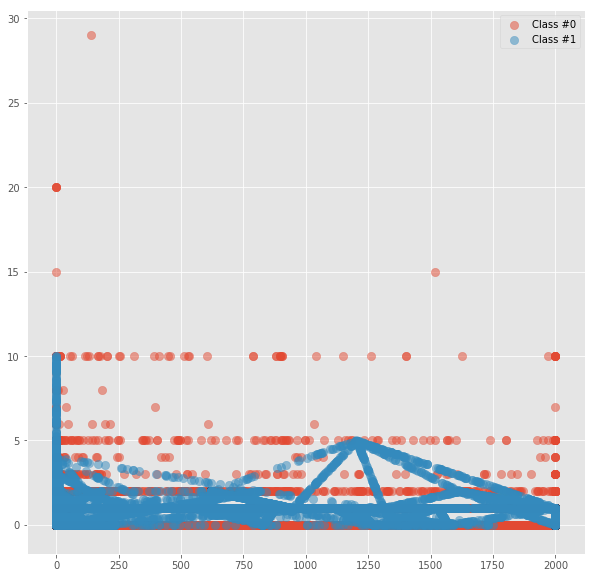

In [25]:
X_ada, y_ada = makeOverSamplesADASYN(X_train,y_train)
print('Target percentage')
print('y.shape = ',y_ada.shape[0], '     y.mean() = ', y_ada.mean())
print('y_neg.shape = ',(y_ada == 0).sum(), '  y_pos.shape = ',(y_ada == 1).sum())
plot_two_classes(X_ada, y_ada)
plt.show()    

In [26]:
models = {'LR_AdasynSampling': LogisticRegression(),
          'DT_AdasynSampling': DecisionTreeClassifier()}

for model in models.keys():
    models[model].fit(X_ada, y_ada)
    
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [27]:
for model in models.keys():
    ACC=metrics.accuracy_score(y_test,y_pred[model])
    F1=metrics.f1_score(y_test,y_pred[model])
    F_beta=metrics.fbeta_score(y_test,y_pred[model], beta=10)
    Mtrs.loc[i] = [model,ACC,F1,F_beta]
    i=i+1
Mtrs

,Model,ACC,F1,F_Beta
0,LR_Unbalanced,0.994291,0.000000,0.000000
1,DT_Unbalanced,0.988322,0.132762,0.156012
2,LR_UnderSampling,0.548341,0.017561,0.397794
3,DT_UnderSampling,0.624059,0.020583,0.420399
4,LR_OverSampling,0.555001,0.018444,0.414579
5,DT_OverSampling,0.989793,0.149038,0.156409
6,LR_SmoteSampling,0.713907,0.021885,0.376891
7,DT_SmoteSampling,0.983536,0.111975,0.179600
8,LR_AdasynSampling,0.599521,0.018792,0.397932
9,DT_AdasynSampling,0.983391,0.088608,0.139765


In [28]:
def makeOverSamplesSMOTE(X,y):
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=42)
    X, y = sm.fit_sample(X, y)
    return X,y

Target percentage 0.5 k  5
y.shape =  206882      y.mean() =  0.5
y_neg.shape =  103441   y_pos.shape =  103441


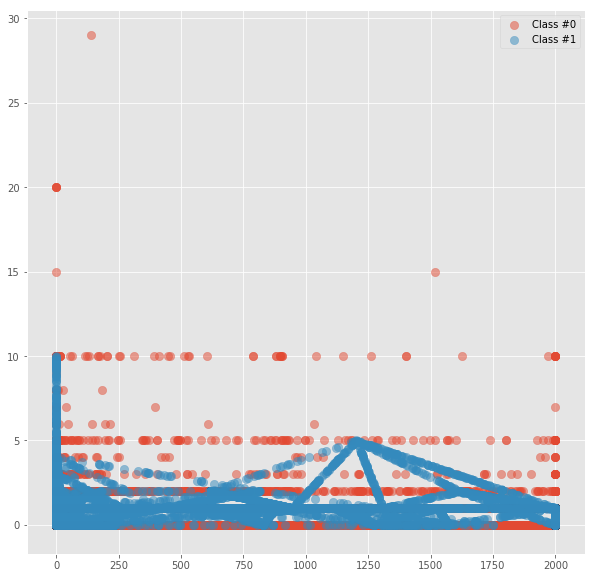

In [29]:
X_s, y_s = makeOverSamplesSMOTE(X_train, y_train)
print('Target percentage', 0.5, 'k ', 5)
print('y.shape = ',y_s.shape[0], '     y.mean() = ', y_s.mean())
print('y_neg.shape = ',(y_s == 0).sum(), '  y_pos.shape = ',(y_s == 1).sum())
plot_two_classes(X_s, y_s)
plt.show()    

In [30]:
models = {'LR_SmoteSampling': LogisticRegression(),
          'DT_SmoteSampling': DecisionTreeClassifier()}

for model in models.keys():
    models[model].fit(X_s, y_s)
    
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [31]:
for model in models.keys():
    ACC=metrics.accuracy_score(y_test,y_pred[model])
    F1=metrics.f1_score(y_test,y_pred[model])
    F_beta=metrics.fbeta_score(y_test,y_pred[model], beta=10)
    Mtrs.loc[i] = [model,ACC,F1,F_beta]
    i=i+1
Mtrs

,Model,ACC,F1,F_Beta
0,LR_Unbalanced,0.994291,0.000000,0.000000
1,DT_Unbalanced,0.988322,0.132762,0.156012
2,LR_UnderSampling,0.548341,0.017561,0.397794
3,DT_UnderSampling,0.624059,0.020583,0.420399
4,LR_OverSampling,0.555001,0.018444,0.414579
5,DT_OverSampling,0.989793,0.149038,0.156409
6,LR_SmoteSampling,0.713907,0.021885,0.376891
7,DT_SmoteSampling,0.983536,0.111975,0.179600
8,LR_AdasynSampling,0.599521,0.018792,0.397932
9,DT_AdasynSampling,0.983391,0.088608,0.139765


# Exercise 15.6 (3 points)

Compare and comment about the results

En general se comportaron mejor los casos de OverSampling. se puede observar segun los resultados obtenidos, que los unicos que alcanzan un F_Beta score alto son Logistic Regression y opuestanmente los que alcanzan Accuracy alto son los Desicion Tree, el unicp caso que de Decision Tree que no cumple lo mencionado corresponde al que se entreno por medio del UnderSampling . Los métodos Smote y Adasyn que utilizan también un tipo de OverSampling creando muestras sinteticas, no se destacaron de forma sobresaliente sobre los otros métodos sin embargo alcanzaron un Accuracy alto en los decision tree.